### Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
sns.set_style('whitegrid')
sns.set(font_scale = 1.2)
from catboost import CatBoostClassifier
from catboost import Pool, cv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score


### Loading train and test data

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df_train = pd.read_csv('train.csv')
d=pd.read_csv('real.csv')
df_train.describe()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,5416.500000,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,3127.650742,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,0.000000,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,2708.250000,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,5416.500000,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,8124.750000,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,10833.000000,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [4]:
df_train.describe()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,5416.500000,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,3127.650742,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,0.000000,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,2708.250000,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,5416.500000,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,8124.750000,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,10833.000000,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


In [41]:
df_test=pd.read_csv('test.csv')
df_test.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


### Concatenation of train and test data to preprocess them in one shot

In [6]:
data_all = pd.concat((df_train,df_test),ignore_index=True)

In [42]:
data_all.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y,elipse_area,perimeter,area_diff,perimeter_diff
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,...,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ,58319.938999,975.206661,81.938999,3.903661
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,...,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER,44632.383967,757.639763,117.383967,0.038763
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,...,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON,31733.799054,651.147573,71.799054,-2.635427
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,...,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON,38807.103439,723.051719,29.103439,-10.968281
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,...,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA,42679.076627,757.967885,149.076627,-17.435115


### Data Visualization

#### demonstrating the overlap between sira and dermason

In [8]:
data= data_all[(data_all['y']=='SIRA') | (data_all['y']=='DERMASON')]
data.drop('ID',axis=1,inplace=True)

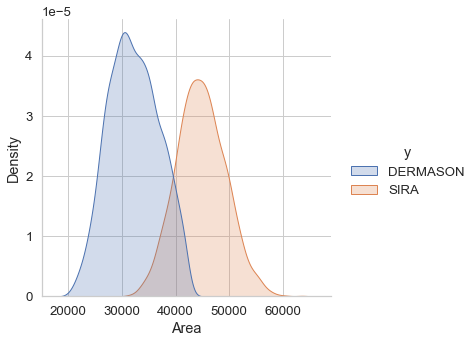

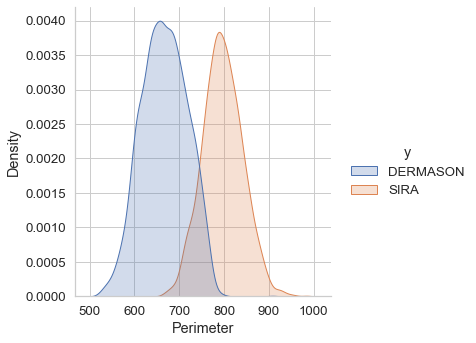

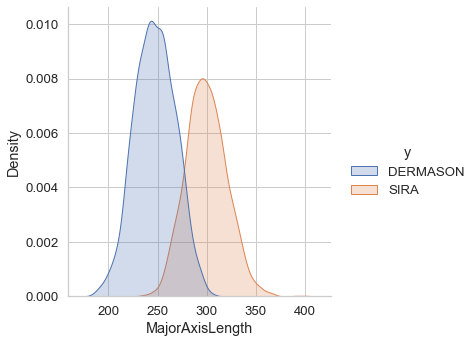

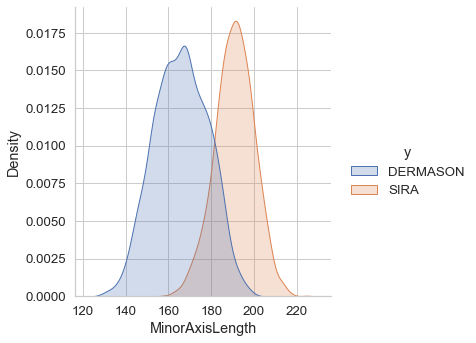

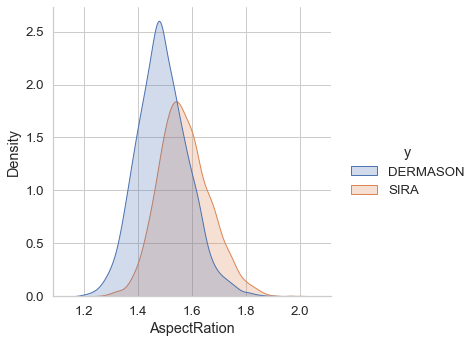

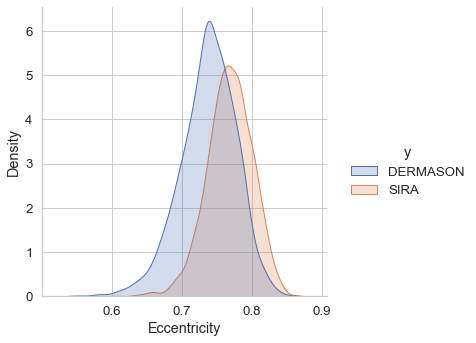

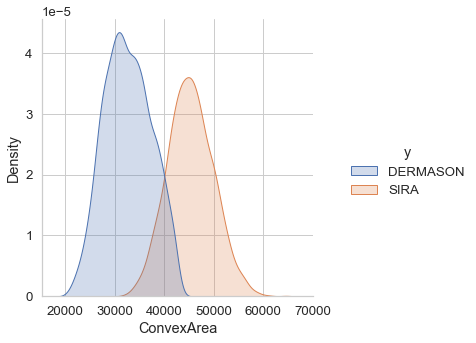

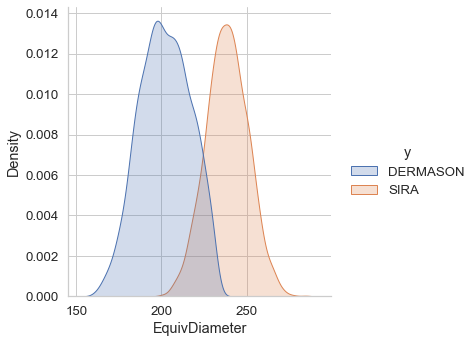

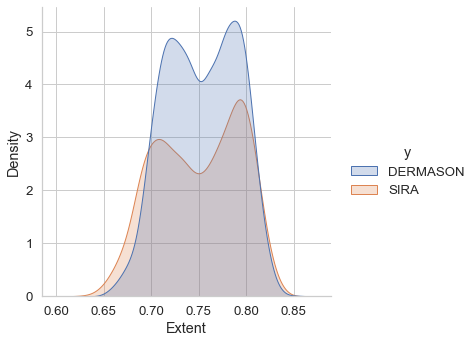

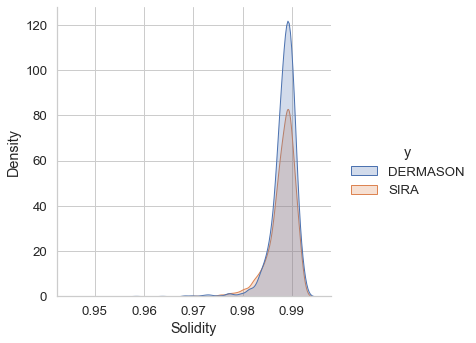

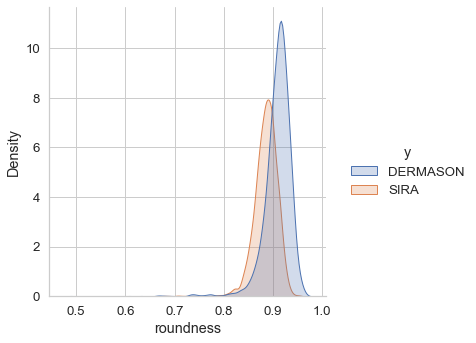

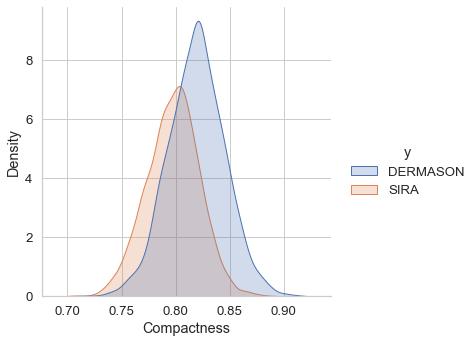

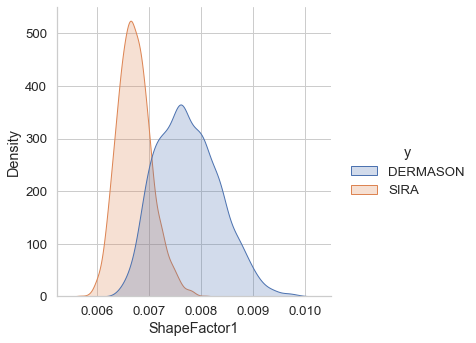

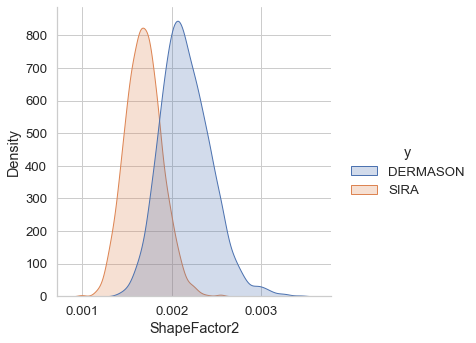

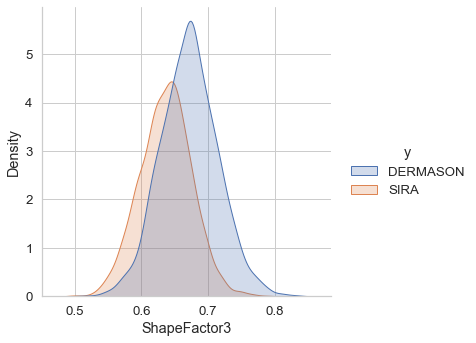

In [10]:
sns.set_style('whitegrid')
for i in data.columns[:-2]:
    sns.displot(x=i,data=data,kind='kde',hue='y',fill=True)
    plt.show()

### Feature Engineering

In [11]:
# area of ellipse containing the bean
data_all['elipse_area']= np.pi* data_all['MajorAxisLength']*data_all['MinorAxisLength']/4

# perimeter of the ellipse containing the bean
data_all['perimeter']= 2*np.pi * np.sqrt(((0.5*data_all['MajorAxisLength'])**2+(0.5*data_all['MinorAxisLength'])**2)/2)

# difference between ellipse area and bean area
data_all['area_diff']= data_all['elipse_area']-data_all['Area']

# difference between ellipse perimeter and bean perimeter
data_all['perimeter_diff']= data_all['perimeter']-data_all['Perimeter']

In [13]:
data_all.drop(['ID'],axis=1,inplace=True)

### Separating train data from test data

In [14]:
train_data= data_all[data_all['y'].notna()]
test_data= data_all[data_all['y'].isna()]

In [15]:
y= train_data['y'].copy()
train_data.drop(['y'],axis=1,inplace=True)
train_data['y']=y

In [16]:
test_data.drop(['y'],axis=1,inplace=True)

In [17]:
train_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,elipse_area,perimeter,area_diff,perimeter_diff,y
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,...,0.685561,0.006820,0.000929,0.469994,0.998595,58319.938999,975.206661,81.938999,3.903661,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,...,0.896387,0.005966,0.002376,0.803510,0.997370,44632.383967,757.639763,117.383967,0.038763,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,...,0.836931,0.007577,0.002293,0.700453,0.997737,31733.799054,651.147573,71.799054,-2.635427,DERMASON
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,...,0.827733,0.006923,0.002005,0.685142,0.999250,38807.103439,723.051719,29.103439,-10.968281,DERMASON
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,...,0.827499,0.006612,0.001912,0.684755,0.996507,42679.076627,757.967885,149.076627,-17.435115,SIRA


In [18]:
test_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,elipse_area,perimeter,area_diff,perimeter_diff
10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889,59881.224320,965.797476,2222.224320,10.363476
10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956,28830.932669,621.888210,58.932669,-8.473790
10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607,54918.245860,850.690407,241.245860,-60.331593
10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596,24861.894666,578.086581,34.894666,-0.217419
10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803,143022.328304,1397.729554,1172.328304,-35.117446


### Train data shuffling 

In [19]:
train_data = train_data.sample(frac=1,random_state=444).reset_index(drop=True)

In [21]:
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]


In [22]:
X_train.shape

(10834, 20)

In [23]:
y_train.shape

(10834,)

### Grid Search

In [24]:
cbc = CatBoostClassifier(  
                            
                         loss_function= 'MultiClass',

                         eval_metric='Accuracy',
                              
                          verbose=False,
                          
                          task_type='CPU',
    
                            random_state=42,    
    
                        )

params = { 'learning_rate':[0.01,0.02,0.03], 
         'border_count':[10,100],
        'depth': [2,4],
        'l2_leaf_reg': [10,20],
         'iterations':[2000,3000]}


Grid_CBC = GridSearchCV(estimator=cbc, param_grid = params, cv = 3,refit=True, n_jobs=-1)

Grid_CBC.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001D295680130>,
             n_jobs=-1,
             param_grid={'border_count': [10, 100], 'depth': [2, 4],
                         'iterations': [2000, 3000], 'l2_leaf_reg': [10, 20],
                         'learning_rate': [0.01, 0.02, 0.03]})

### Model with best parameters

In [25]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.9291127434639185

 The best parameters across ALL searched params:
 {'border_count': 100, 'depth': 2, 'iterations': 3000, 'l2_leaf_reg': 10, 'learning_rate': 0.03}


### Evaluation after training on the whole dataset

In [26]:
final_model= Grid_CBC.best_estimator_

In [27]:
final_model.best_score_

{'learn': {'Accuracy': 0.9419420343363485, 'MultiClass': 0.1590479157884619}}

### Confusion matrix 

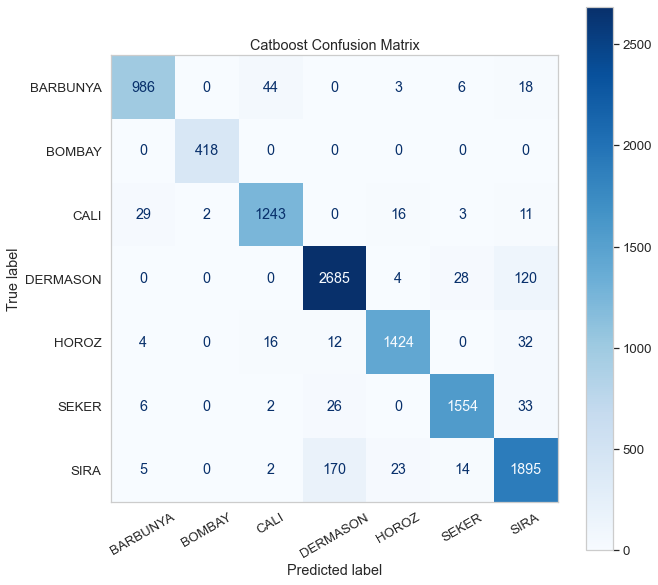

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(final_model, X_train, y_train,ax=ax,cmap='Blues')  
plt.xticks(rotation=30)
plt.grid()
plt.title('Catboost Confusion Matrix')
plt.show()  

In [30]:
data_all['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

### Classification Report

In [31]:
train_preds = final_model.predict(X_train)
report_cb = classification_report(y_train, train_preds, output_dict=True)
report = pd.DataFrame(report_cb).transpose()
report

,precision,recall,f1-score,support
BARBUNYA,0.957282,0.932829,0.944897,1057.000000
BOMBAY,0.995238,1.000000,0.997613,418.000000
CALI,0.951033,0.953221,0.952126,1304.000000
DERMASON,0.928102,0.946422,0.937173,2837.000000
HOROZ,0.968707,0.956989,0.962813,1488.000000
SEKER,0.968224,0.958667,0.963422,1621.000000
SIRA,0.898530,0.898530,0.898530,2109.000000
accuracy,0.941942,0.941942,0.941942,0.941942
macro avg,0.952445,0.949523,0.950939,10834.000000
weighted avg,0.942123,0.941942,0.941985,10834.000000


### Feature Importance

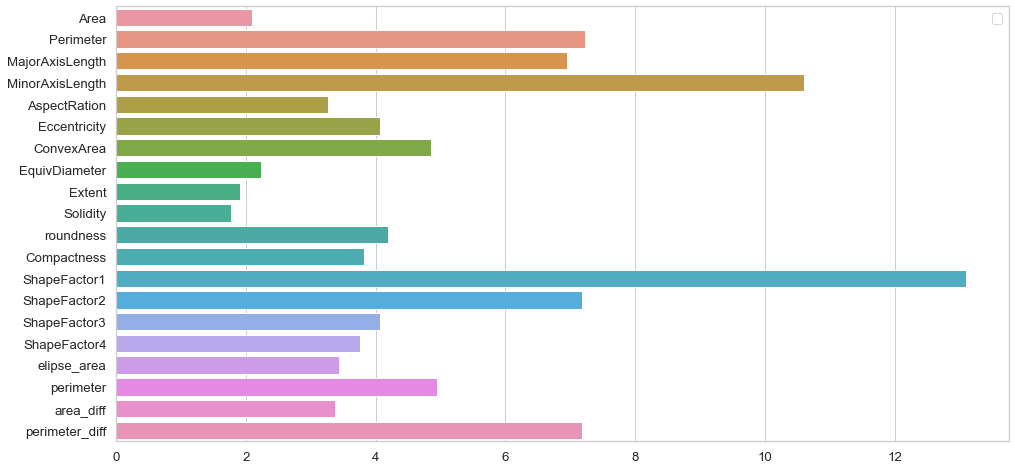

In [33]:
feature_importance= final_model.get_feature_importance()*100/sum(final_model.get_feature_importance())
plt.figure(figsize=(16,8))
graph=sns.barplot(x=feature_importance,y=X_train.columns)
plt.legend(X_train.columns,feature_importance)
# plt.xticks(rotation=90)
plt.show()

### Tree Graph

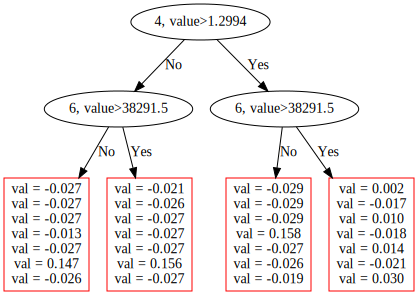

In [34]:
final_model.plot_tree(tree_idx=0)

### Generating predictions

In [35]:
predictions= final_model.predict(test_data,ntree_start=0.1)

In [36]:
predictions.shape

(2709, 1)

In [37]:
predictions

array([['HOROZ'],
       ['DERMASON'],
       ['BARBUNYA'],
       ...,
       ['HOROZ'],
       ['DERMASON'],
       ['SIRA']], dtype=object)

In [38]:
id=list(df_test['ID'])
pred= pd.DataFrame()
pred['ID']=id
pred['y']=predictions
pred

,ID,y
0,10834,HOROZ
1,10835,DERMASON
2,10836,BARBUNYA
3,10837,DERMASON
4,10838,BOMBAY
...,...,...
2704,13538,CALI
2705,13539,SEKER
2706,13540,HOROZ
2707,13541,DERMASON


In [39]:
pred['y'].value_counts()

DERMASON    724
SIRA        533
SEKER       399
HOROZ       362
CALI        324
BARBUNYA    261
BOMBAY      106
Name: y, dtype: int64

### Exporting csv submission file

In [40]:
pred.to_csv('subcb.csv',index=False)